In [27]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from db_keys import user_and_pw


In [28]:
# Create db object
engine_string = 'postgresql://' + user_and_pw + '@localhost:5432/hp_employees'
engine = create_engine(engine_string)

In [29]:
# Enable tables to be defined as classes and display
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['employees', 'department', 'dept_manager', 'salaries', 'titles', 'dept_emp']

In [30]:
# Establish db connectin
conn = engine.connect()

In [31]:
# Read in salaries table data and examine
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [32]:
# Read in titles table data and examine
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [33]:
# Create dataframe with Salary table fields needed for bar chart
salaries_df = pd.DataFrame(salaries, columns = ['emp_no','salary'])
salaries_df.set_index('emp_no', inplace = True)
salaries_df.head()

,salary
emp_no,
10001,60117
10002,65828
10003,40006
10004,40054
10005,78228


In [34]:
# Create dataframe with Titles table fields needed for bar chart
titles_df = pd.DataFrame(titles, columns = ['emp_no','title'])
titles_df.set_index('emp_no', inplace = True)
titles_df.head()

,title
emp_no,
10001,Senior Engineer
10002,Staff
10003,Senior Engineer
10004,Engineer
10004,Senior Engineer


In [35]:
# Merge salary and title dataframes on emp_no
merge_df = pd.merge(salaries_df, titles_df, on="emp_no", how="outer")
merge_df.head()

,salary,title
emp_no,,
10001,60117,Senior Engineer
10002,65828,Staff
10003,40006,Senior Engineer
10004,40054,Engineer
10004,40054,Senior Engineer


In [36]:
# Create dataframe of average salaries grouped by title
bar_chart_df = merge_df.groupby('title').mean()

<function matplotlib.pyplot.show(*args, **kw)>

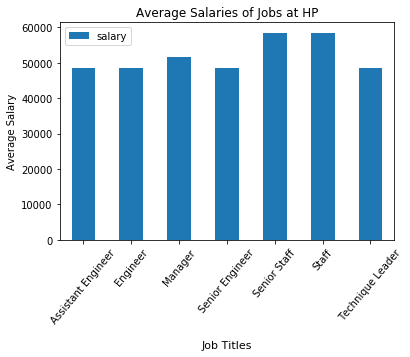

In [37]:
# Plot a bar chart of average salaries grouped by title
chart = bar_chart_df.plot.bar()
plt.title("Average Salaries of Jobs at HP", size = 12)
plt.xlabel('Job Titles', size = 11)
plt.ylabel('Average Salary')
plt.xticks(rotation=50)
chart.xaxis.labelpad = 15
plt.savefig("hp_salaries_by_title",bbox_inches="tight")
plt.show